<a href="https://colab.research.google.com/github/mevlt01001/emotion-detecting/blob/main/emotion_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Connect

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/CNN/emotion')

# Load Data

In [3]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data = pd.read_csv('data.csv')

In [4]:
data.head(10)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,Training,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,Training,255 254 255 254 254 179 122 107 95 124 149 150...


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
data.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

kolon isimlerinnden **Usage** ve **pixels** in başında fazladan bir boşluk karakteri var. Bu durum karışıklığa sebebiyet vermemk adına aşağıdaki satırda duzeltilecektir.

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['emotion', 'Usage', 'pixels'], dtype='object')

**train - test** ayrımını kendim yapmak istiyorum.

In [9]:
data.drop('Usage', axis=1, inplace=True)

In [10]:
data.head(10)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


pixelleri inceleyelim. Bu veri setindeki pixeller 48x48 buyutundan flat edilerek tek bir dizi haline getirilmiş. Bunu düzleyip eski haline getirelim.

In [11]:
import numpy as np

# define a function that converts pixels into a reshaped 48x48 image
def cnvtImage(pixels):
    float_pixels = [float(pixel) for pixel in pixels.split(' ')]
    image = np.array(float_pixels).reshape(48, 48)
    return image

In [12]:
# convert pixels
data['pixels'] = data['pixels'].apply(cnvtImage)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


görselleri ve karşılık gelen sınıflarını görmeye çalışalım.

Öncelikle her sınıf için 5 görsel çizdirelim.

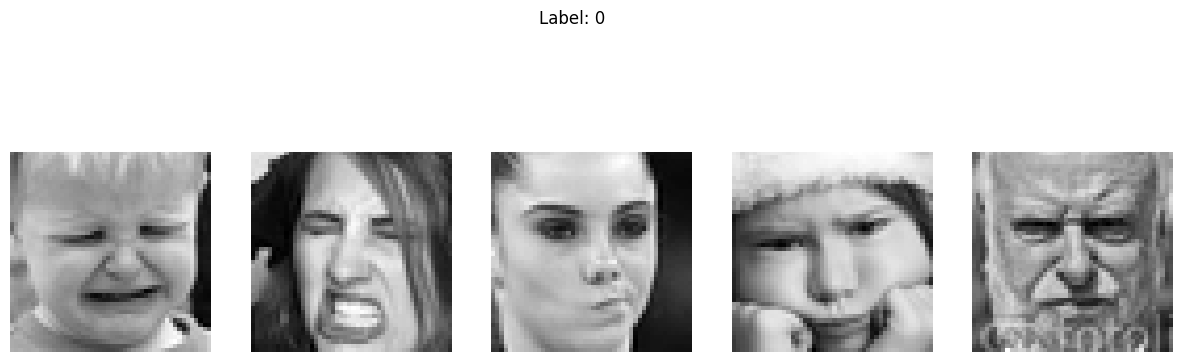

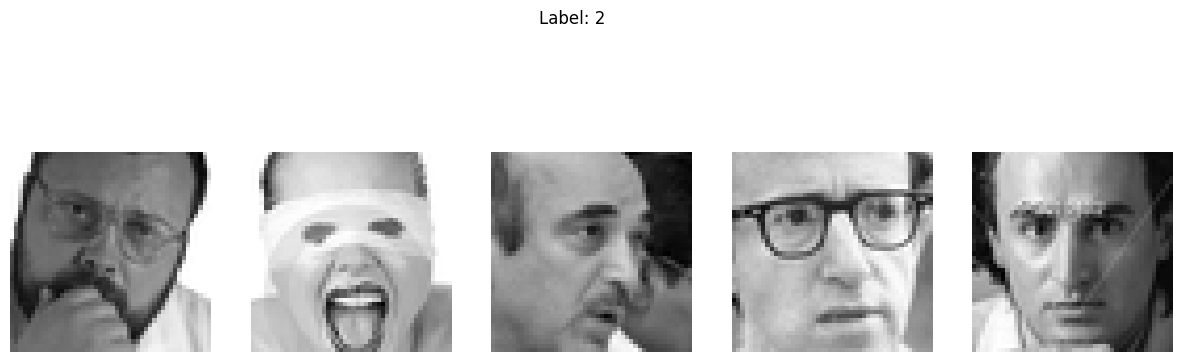

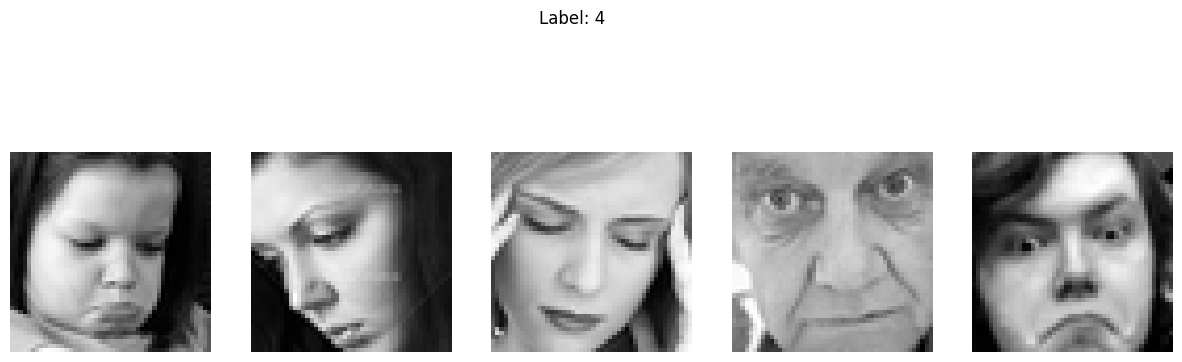

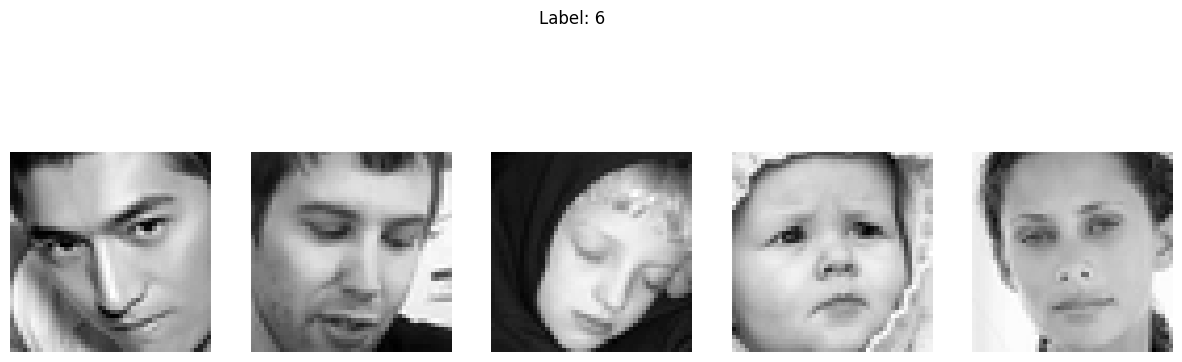

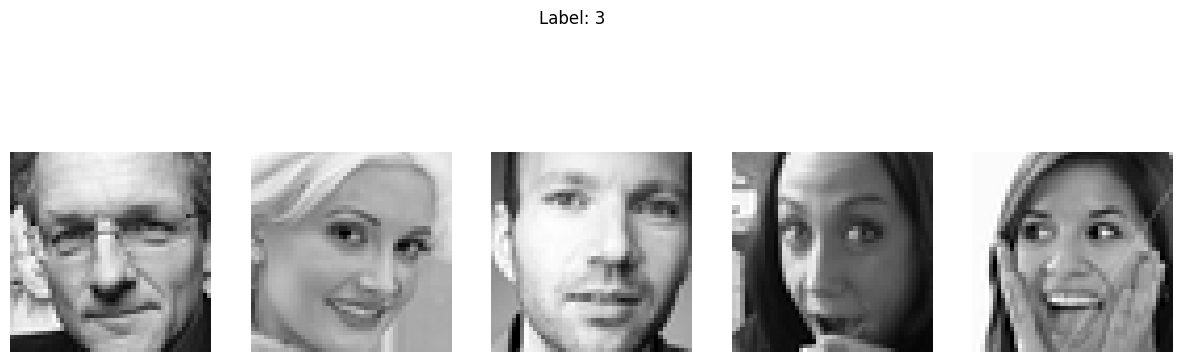

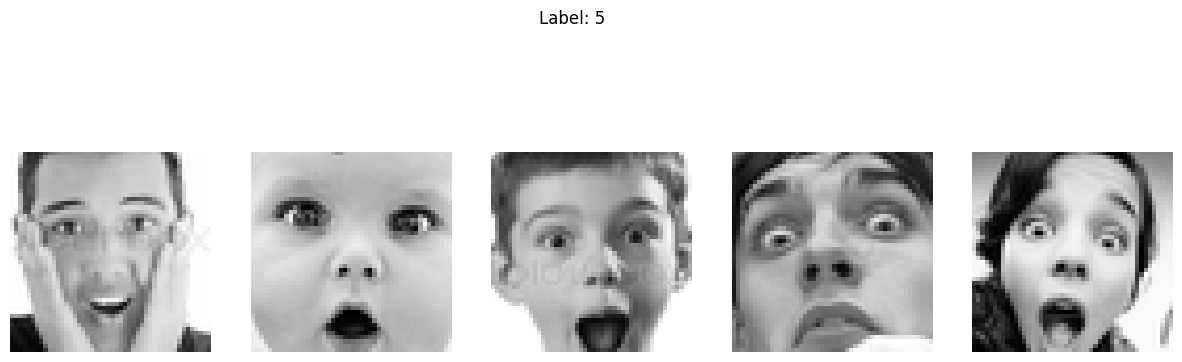

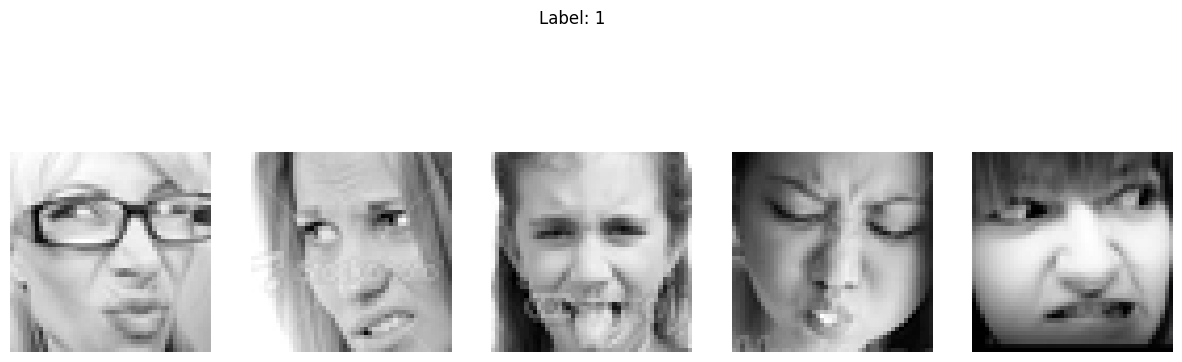

In [14]:
import matplotlib.pyplot as plt

labels = data['emotion'].unique()
for label in labels:
    label_data = data[data['emotion'] == label].sample(5).reset_index(drop=True)
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i, row in label_data.iterrows():
        axs[i].imshow(row['pixels'], cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Label: {label}')
    plt.show()


Sonucu inceleyecek olursak:
- label 1: iğrenmiş
- label 5: şaşırmış
- label 3: mutlu
- label 6: nötr
- label 4: üzgün
- label 2: korkmuş

labelları düzenleyelim. sonrasında to_categorical işlemi ile kategorik hale getirerek train işlemne hazır edelim.

In [15]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

data['emotion_label'] = data['emotion'].map(emotions)
data.sample(10)

,emotion,pixels,emotion_label
3794,0,"[[202.0, 186.0, 73.0, 15.0, 16.0, 33.0, 43.0, ...",Angry
24028,4,"[[22.0, 18.0, 21.0, 27.0, 30.0, 31.0, 33.0, 27...",Sad
33985,2,"[[87.0, 103.0, 125.0, 136.0, 145.0, 152.0, 155...",Fear
22155,0,"[[13.0, 27.0, 57.0, 106.0, 121.0, 129.0, 138.0...",Angry
526,0,"[[253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 25...",Angry
4890,6,"[[226.0, 226.0, 226.0, 226.0, 226.0, 226.0, 22...",Neutral
25084,5,"[[109.0, 107.0, 179.0, 161.0, 146.0, 218.0, 24...",Surprise
15740,6,"[[10.0, 12.0, 10.0, 10.0, 5.0, 4.0, 3.0, 2.0, ...",Neutral
19114,0,"[[209.0, 53.0, 0.0, 5.0, 13.0, 16.0, 16.0, 44....",Angry
14661,0,"[[48.0, 39.0, 31.0, 29.0, 27.0, 28.0, 28.0, 27...",Angry


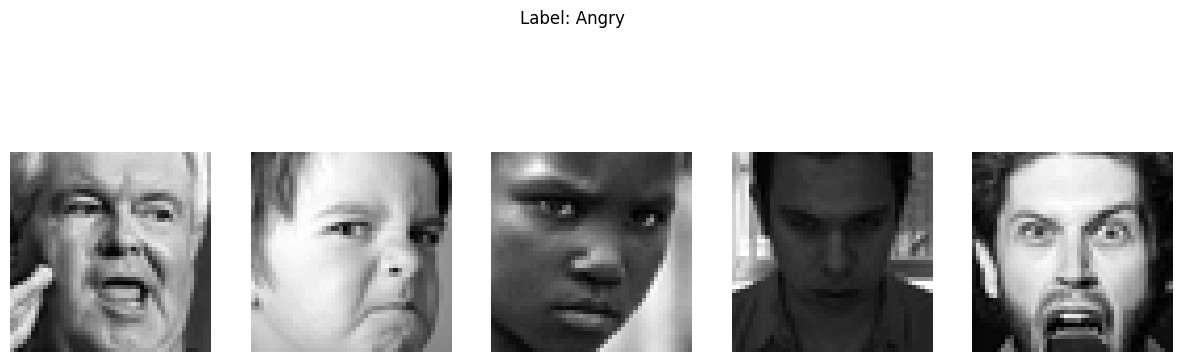

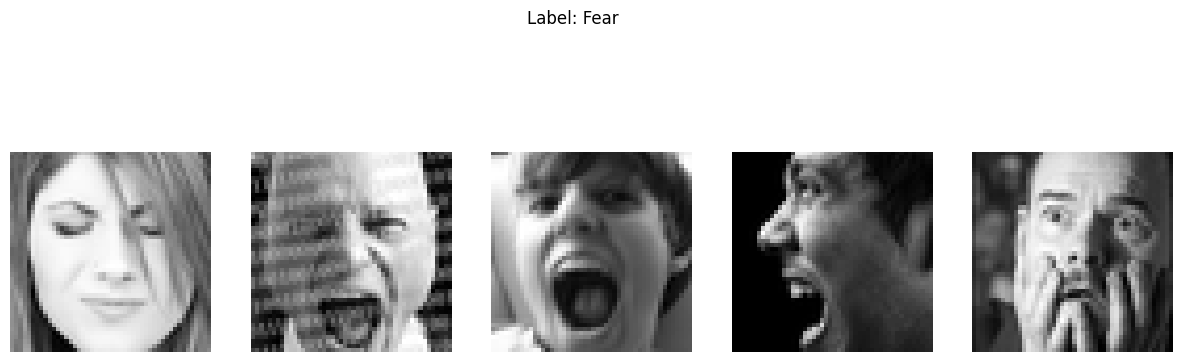

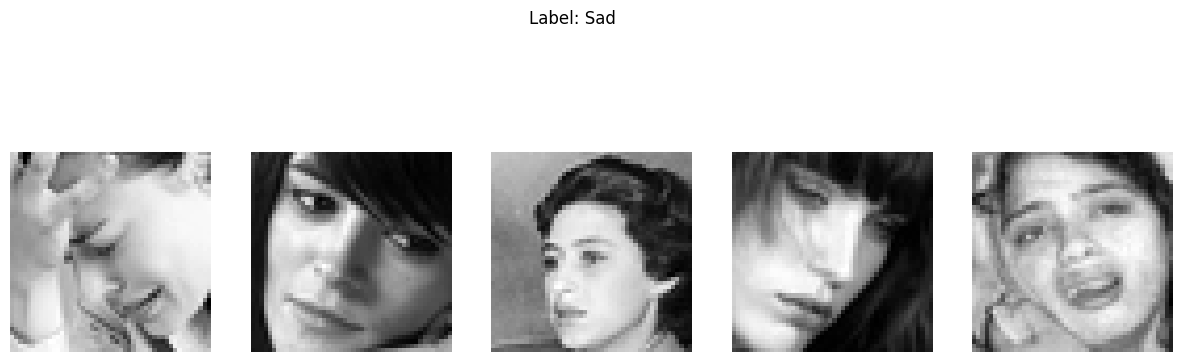

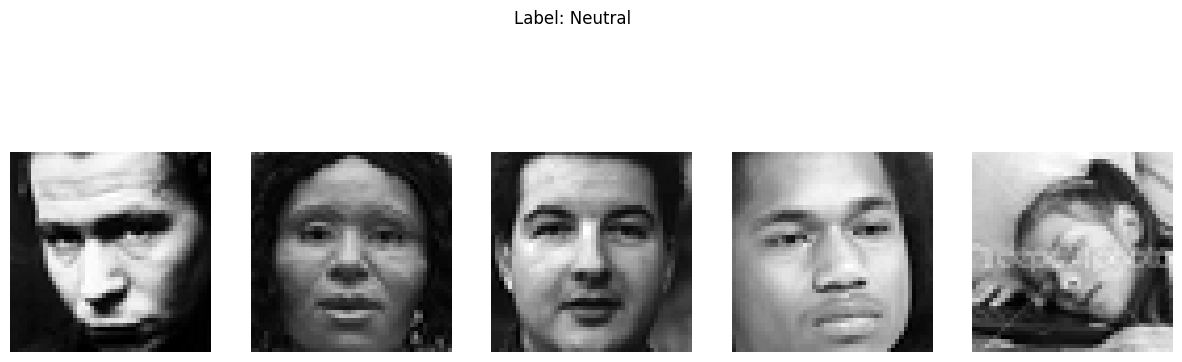

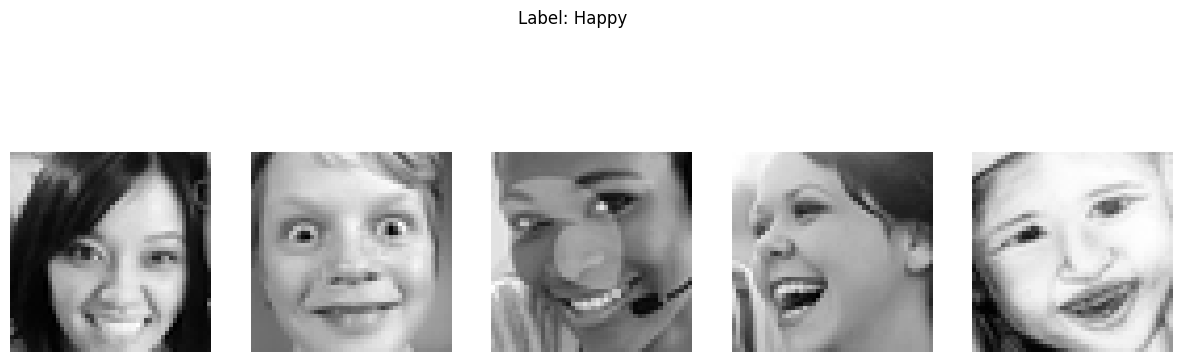

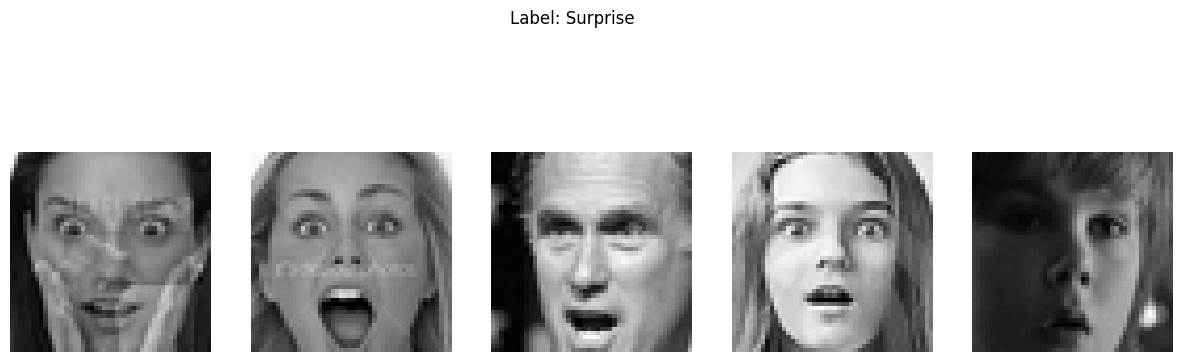

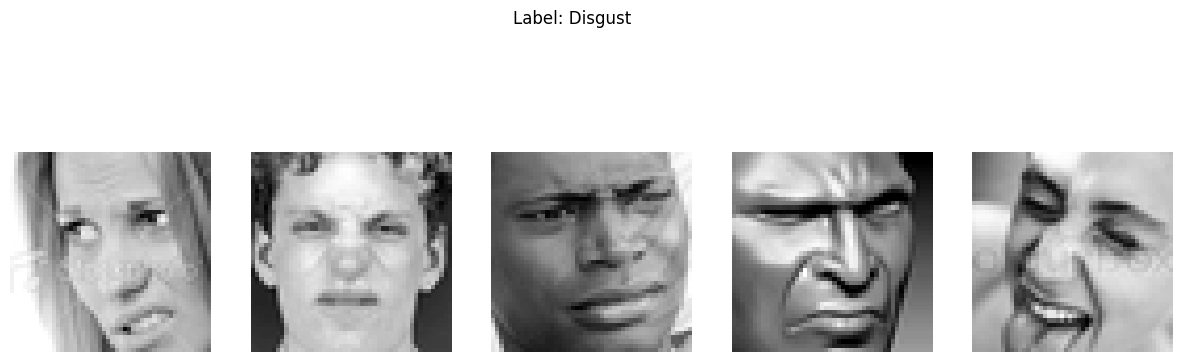

In [16]:
labels = data['emotion_label'].unique()
for label in labels:
    label_data = data[data['emotion_label'] == label].sample(5).reset_index(drop=True)
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i, row in label_data.iterrows():
        axs[i].imshow(row['pixels'], cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Label: {label}')
    plt.show()

to_categorical

In [17]:
from tensorflow.keras.utils import to_categorical

X = np.array(data['pixels'].tolist())
y = to_categorical(data['emotion'])

In [18]:
X = X.reshape(-1, 48, 48, 1)

In [19]:
X.shape

(35887, 48, 48, 1)

In [20]:
y.shape

(35887, 7)

# Train-Test splitting

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [22]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)
X_test shape: (3589, 48, 48, 1)
y_test shape: (3589, 7)
X_val shape: (3589, 48, 48, 1)
y_val shape: (3589, 7)


# Modelling

Görüntü işlemek için basit bir model mimarisi yapalım.

3 tane convolisyon ve ortaklama bloğu olsun. Sonrasında tam bağlı katman.

**ilk bloğumuz:**

*input(48x48x1)*
- 5x5 64 filtreli bir konvolisyon katmanı ***output(44x44x64)***
- Maxpooling ortaklama ***output(22x22x64)***

**ikinci bloğumuz:**
- 3x3 32 filtreli convolisyon katmanı ***output(20x20x32)***
- Maxpooling ortaklama ***output(10x10x23)***

**üçüncü bloğumuz:**
- 3x3 16 filtreli convolüsyon katmanı ***output(8x8x16)***
- maxpooling ortaklama ***output(4x4x16)***
- `flatten()` ***output(1x256)***

**tam bağlı(Fully connected) katman:**
- 256(relu)
- 128(relu)
- 7(softmax)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

# ILK KATMAN
model.add(Conv2D(64, (5, 5), data_format='channels_last', kernel_initializer='he_normal', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))# output shape: 44 x 44 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))# output shape: 22 x 22 x 64

# IKINCI KATMAN
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))# output shape: 20 X 20 X 32
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))# output shape: 10 x 10 x 32
model.add(Dropout(0.5))

# UCUNCU KATMAN
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))# output shape: 8 x 8 x 16
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))# output shape: 4 x 4 x 16
model.add(Dropout(0.5))

model.add(Flatten())# output shape: 256

# tam bağlı katman
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 44, 44, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 20, 20, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 20, 20, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,791 (487.46 KB)

 Trainable params: 124,567 (486.59 KB)

 Non-trainable params: 224 (896.00 B)

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [28]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2403 - loss: 1.8797 - val_accuracy: 0.3561 - val_loss: 1.6825
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3287 - loss: 1.6837 - val_accuracy: 0.3920 - val_loss: 1.5847
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3718 - loss: 1.6017 - val_accuracy: 0.3979 - val_loss: 1.5274
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3951 - loss: 1.5552 - val_accuracy: 0.3536 - val_loss: 1.6714
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4169 - loss: 1.4995 - val_accuracy: 0.4511 - val_loss: 1.4709
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4282 - loss: 1.4737 - val_accuracy: 0.4519 - val_loss: 1.4000
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4432 - loss: 1.4466 - val_accuracy: 0.3801 - val_loss: 1.5789
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4504 - loss: 1.4199 - val_ac

# Evaluation

In [29]:
pred = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [31]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

pred = [emotions[p] for p in pred]
true = [emotions[t] for t in true]

              precision    recall  f1-score   support

       Angry       0.50      0.37      0.42       480
     Disgust       0.50      0.05      0.09        60
        Fear       0.43      0.13      0.20       515
       Happy       0.75      0.78      0.77       883
     Neutral       0.49      0.61      0.54       657
         Sad       0.37      0.53      0.44       597
    Surprise       0.64      0.77      0.70       397

    accuracy                           0.55      3589
   macro avg       0.53      0.46      0.45      3589
weighted avg       0.54      0.55      0.53      3589



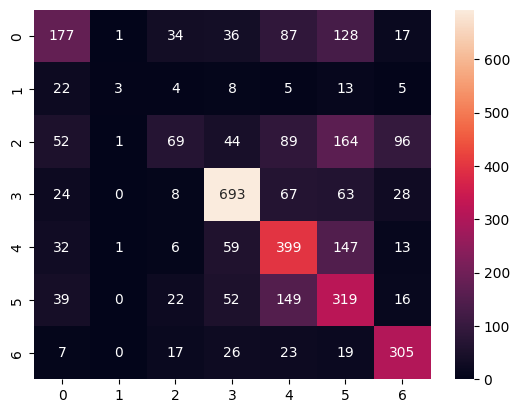

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(true, pred))


Modelin performansı, sınıflandırma görevinde farklı duyguları ayırt etme konusunda değişkenlik gösteriyor. Doğruluk oranı %55 civarında olup, modelin rastgele tahminlerden biraz daha iyi bir performans sergilediğini söyleyebiliriz. Ancak, bazı sınıflar için performans tatmin edici düzeyde değil.
## Sınıf Bazında Yorumlar:

- **Angry (Öfkeli)**:

Bu sınıf için precision %50, recall ise %37 olarak elde edildi. Öfkeli durumları tanımada model zorlanıyor. Yanlış pozitiflerin yüksek olduğu bu sınıf için daha fazla örnek veya iyileştirilmiş özellik çıkarımı gerekebilir.

- **Disgust (Tiksinti)**:

Precision %50 olmasına rağmen, recall yalnızca %5. Tiksinti duygusunu ayırt etmekte model oldukça zorlanıyor, bu da verideki dengesizlikten kaynaklanabilir.

- **Fear (Korku)**:

Precision %43, recall %13 seviyesinde. Bu da modelin korkuyu tanıma konusunda zayıf kaldığını gösteriyor.

- **Happy (Mutlu)**:

Precision ve recall %75-78 seviyelerinde. Mutluluk duygusu diğer sınıflara göre belirgin şekilde iyi tanınıyor.

- **Neutral (Nötr)**:

Precision %49, recall %61 seviyesinde. Nötr ifadeleri tanımada ortalama bir performans mevcut.

- **Sad (Üzgün)**:

Bu sınıf için precision %37, recall ise %53. Model üzgün sınıfları ayırt ederken daha fazla yanlış pozitif üretmiş.

- **Surprise (Şaşkınlık)**:

Precision %64, recall %77. Şaşkınlık durumu, mutluluk gibi daha iyi tanınan sınıflar arasında.

## Genel Değerlendirme:

Makro ortalamalar (precision %53, recall %46, f1-score %45) modelin her sınıf için dengeli bir performans göstermediğini ortaya koyuyor. Özellikle Disgust ve Fear gibi sınıflarda düşük performans sergilemesi, sınıf dengesizliğinden veya modelin bu sınıfları ayırt etmedeki zayıflığından kaynaklanabilir.